#### Matplotlib Seaborn Practice Problem
#### Name: Istiaque Hasan Nihal
#### ID:i23b0034s06

Practice problem 5.1
Find the district-wise total sales price joining fact table and respective dimension table and visualize it to a line chart.



In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

fact_table = pd.read_excel(r'e-com-sales-out.xlsx', sheet_name='Fact_table', engine='openpyxl')
store_dim = pd.read_excel(r'e-com-sales-out.xlsx', sheet_name='Store_dim', engine='openpyxl')

In [3]:
#Importing matplotlitb
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

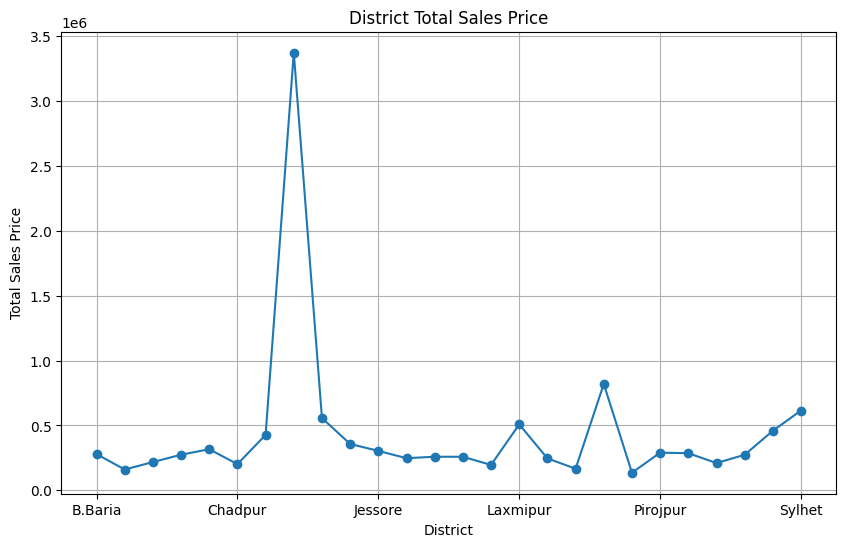

In [5]:
#Merging both table
merged = pd.merge(fact_table, store_dim, left_on='store_key', right_on='store_key')

# Group by district and calculating total sales price
districtWise_total_sales = merged.groupby('district')['total_price'].sum()

# Create a line chart
plt.figure(figsize=(10, 6))
districtWise_total_sales.plot(kind='line', marker='o')
plt.title('District Total Sales Price')
plt.xlabel('District')
plt.ylabel('Total Sales Price')
plt.grid(True)

# Show the plot
plt.show()



Practice problem 5.2
Find year-wise total sales in the Barishal and Sylhet division and plot those data into a linear chart.

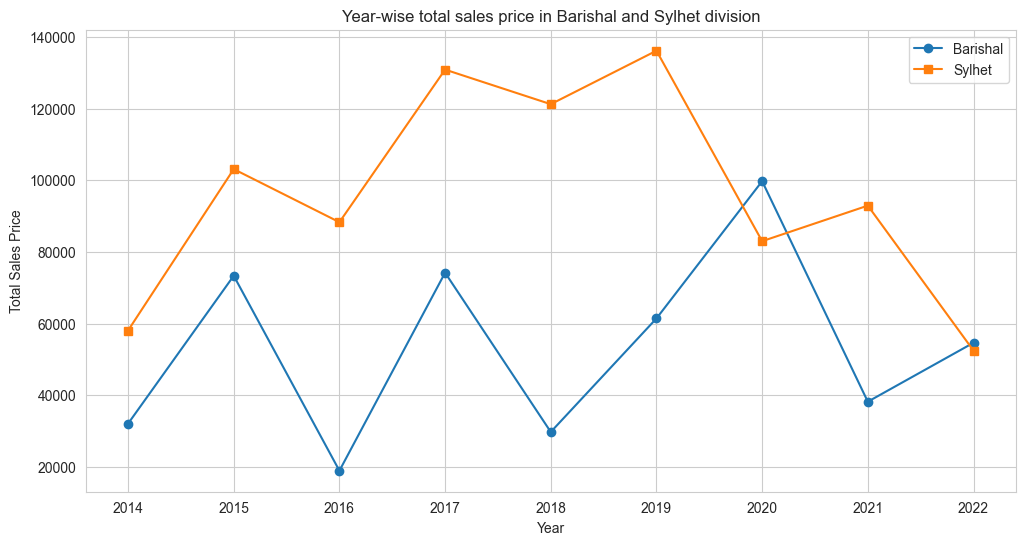

In [10]:
customer_dim = pd.read_excel(r'e-com-sales-out.xlsx', sheet_name='Customer_dim', engine='openpyxl')
add_customer_time_with_fact = pd.merge(pd.merge(fact_table, time_dim, on='time_key'), customer_dim, on='coustomer_key')

dhaka_div = add_customer_time_with_fact.query("division == 'Barishal'")
dhaka_div_g = dhaka_div.groupby('year').aggregate({'total_price': 'sum'}).reset_index()

chittagong_div = add_customer_time_with_fact.query("division == 'Sylhet'")
chittagong_g = chittagong_div.groupby('year').aggregate({'total_price': 'sum'}).reset_index()

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))

plt.plot(dhaka_div_g['year'], dhaka_div_g['total_price'], marker='o', label='Barishal')

plt.plot(chittagong_g['year'], chittagong_g['total_price'], marker='s', label='Sylhet')

plt.xlabel('Year')
plt.ylabel('Total Sales Price')
plt.title("Year-wise total sales price in Barishal and Sylhet division")

plt.legend()
plt.show()

Practice problem 5.3
Find Dhaka's quarterly total sales price and plot it into a scatter chart.

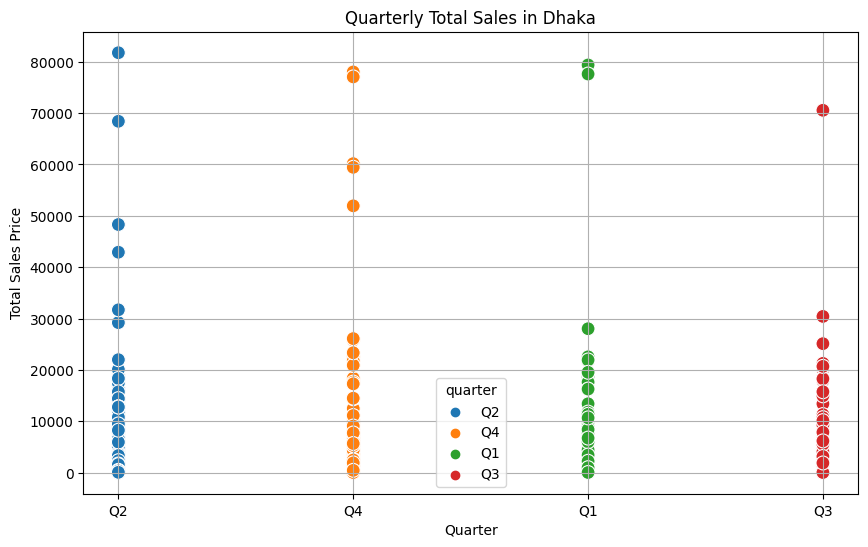

In [59]:
import seaborn as sns

#Filtering Dhaka
filtered_dhaka = merged_time[merged_time['division'].isin(['Dhaka'])]

#Group By quarter with total Prie
Quarterly_total_sales = filtered_dhaka.groupby('quarter')['total_price'].sum()
Quarterly_total_sales.head()

# Create a Scatter chart
plt.figure(figsize=(10, 6))

sns.scatterplot(x=time_dim.quarter, y=filtered_dhaka.total_price, hue=time_dim.quarter,
s=100);
plt.title('Quarterly Total Sales in Dhaka')
plt.xlabel('Quarter')
plt.ylabel('Total Sales Price')
plt.grid(True)

# Show the plot
plt.show()


Practice problem 5.4
What season(quarter) is the best for each product item? Show the data in a Barchart.

Text(0, 0.5, 'Quantity')

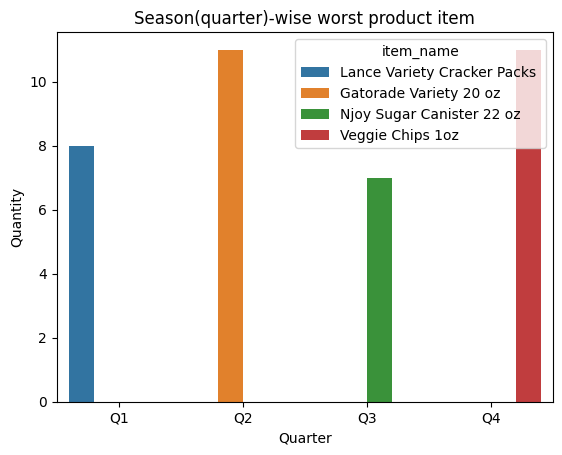

In [81]:
#getiing item table
item_dim = pd.read_excel(r'e-com-sales-out.xlsx', sheet_name='Item_dim', engine='openpyxl')
item_dim.head()

#Merging fact_table, store_dim, time_dim, item_dim together
add_item_time_with_fact = pd.merge(pd.merge(fact_table,time_dim, on='time_key'),item_dim, on='item_key')
add_item_time_with_fact

#GroupBy Items ,quarter with total price
add_item_time_with_fact_g =add_item_time_with_fact.groupby(['item_name', 'quarter']).agg({'quantity':'sum'}).reset_index()
add_item_time_with_fact_g

best_item_quarter = add_item_time_with_fact_g.sort_values(['quarter', 'quantity'], ascending=[False,False]).groupby('quarter').head(1).reset_index()
best_item_quarter


plt.title('Season(quarter)-wise worst product item')

sns.barplot(x='quarter', y = 'quantity', hue = 'item_name', data=worst_item_quarter);

plt.xlabel('Quarter')

plt.ylabel('Quantity')



Practice problem 5.5
What are the average sales of products sales per store monthly? Show the data into a scatter chart.

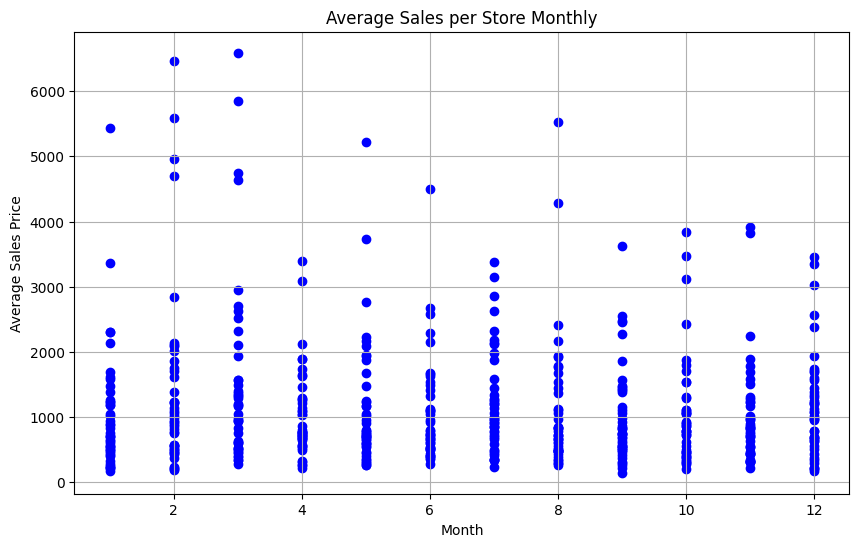

In [90]:
#GroupBy storekey, month with total price
sales_per_month = add_item_time_with_fact.groupby(["store_key", "month"])["total_price"].mean()
# Create a scatter chart
plt.figure(figsize=(10, 6))
plt.scatter(sales_per_month.index.get_level_values(1), sales_per_month.values, color='blue', marker='o')
plt.title('Average Sales per Store Monthly')
plt.xlabel('Month')
plt.ylabel('Average Sales Price')
plt.grid(True)

# Show the plot
plt.show()

In [85]:
time_dim.head()

,time_key,date,hour,day,week,month,quarter,year
0,T00001,08-06-2015 13:53,13,8,2nd Week,6,Q2,2015
1,T00002,30-06-2014 07:44,7,30,4th Week,6,Q2,2014
2,T00003,03-11-2014 05:32,5,3,1st Week,11,Q4,2014
3,T00004,09-10-2018 16:09,16,9,2nd Week,10,Q4,2018
4,T00005,25-05-2020 08:32,8,25,4th Week,5,Q2,2020
